<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Angewandte Geophysik II: Kap 9: Filterung
## 2D FFT with simple squares example
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

Generate a number of squares with value $1$ in a background with value $0$, then
Fourier-transform image, apply a Gaussian blur filter, and the inverse Fourier transform.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
colors = [(1, 1, 1), (0, 0, 0)]  # R -> G -> B
cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=5)
tiny=1e-15

In [70]:
# image size, square side length, number of squares
nx,ny    = 120, 120
sq_size  = 10
nsquares = 10

# The image array (0=background, 1=square) and boolean array of allowed places
# to add a square so that it doesn't touch another or the image sides
image = np.zeros((nx, ny))
sq_locs = np.zeros((nx, ny), dtype=bool)
sq_locs[1:-sq_size-1:,1:-sq_size-1] = True

def place_square():
    """ Place a square at random on the image and update sq_locs. """
    # valid_locs is an array of the indices of True entries in sq_locs
    valid_locs = np.transpose(np.nonzero(sq_locs))
    # pick one such entry at random, and add the square so its top left
    # corner is there; then update sq_locs
    i, j = valid_locs[np.random.randint(len(valid_locs))]
    image[i:i+sq_size, j:j+sq_size] = 1
    imin, jmin = max(0,i-sq_size-1), max(0, j-sq_size-1)
    sq_locs[imin:i+sq_size+1, jmin:j+sq_size+1] = False

# Add the required number of squares to the image
for i in range(nsquares):
    place_square()
    
# Take the 2-dimensional DFT and centre the frequencies
ftimage = np.fft.fft2(image)
ftimage = np.fft.fftshift(ftimage)

# Build and apply a Gaussian filter.
def gmask(sigmax=30,sigmay=30):
    cy, cx = nx/2, ny/2
    x = np.linspace(0, nx, nx)
    y = np.linspace(0, ny, ny)
    X, Y = np.meshgrid(x, y)
    gmask = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
    return gmask


# Finally, take the inverse transform and show the blurred image
ftimagep = ftimage * gmask(8,8)
imagep = np.fft.ifft2(ftimagep)

power  = np.abs(ftimage)**2
power  = 20*np.log10((power+tiny)/power.max())
powerp = np.abs(ftimagep)**2
powerp = 20*np.log10((powerp+tiny)/powerp.max())

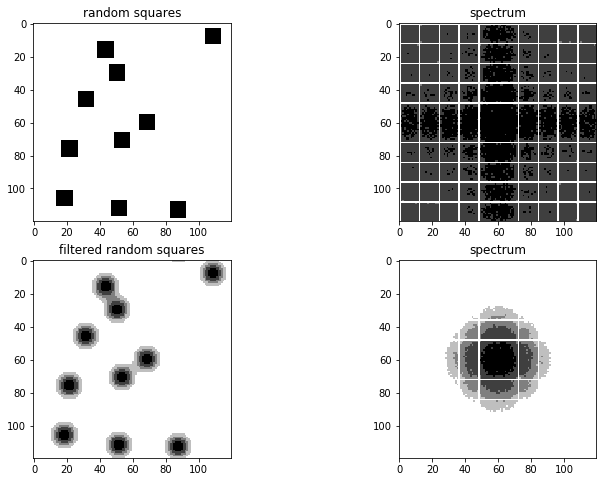

In [71]:
fig,axs = plt.subplots(2,2,figsize=(12.0,8.0))

axs[0,0].set_title('random squares')
axs[0,0].imshow(image,cmap=cm)
axs[0,1].set_title('spectrum')
axs[0,1].imshow(power,cmap=cm)
axs[1,0].set_title('filtered random squares')
axs[1,0].imshow(np.abs(imagep),cmap=cm)
axs[1,1].set_title('spectrum')
axs[1,1].imshow(powerp,cmap=cm)

... done